# Assignment 6

## Try to submit as an HTML file

<font size = "5">
Print your Emory ID below

In [1]:
print("2635174")

2635174


<font size = "5">

Import the "pandas" and "matplotlib.pyplot" library

In [2]:
# Write your answer here:
import pandas as pd
import matplotlib.pyplot as plt

<font size = "5">

(a) Compute function for each individual (map)

<font size = "3">

- Import the datset "data/bmi.csv"
    - **Note that the column `Height` is in $cm$, and `Weight` is in $kg$**
- Write a lambda function for $ BMI = \frac{weight (kg)}{height (m)^2} $
- Use ```list(map(...))``` to calculate $BMI$ for each row of the dataset
- Round the outcome into 2 decimal points
- Store the calculation in a new column in the dataframe called `BMI`
- Display the dataframe


In [7]:
# Write your own code here
dataframe = pd.read_csv("data/bmi.csv")
bmi_func = lambda row: round(row["Weight"] / ((row["Height"]/100)**2), 2)
dataframe["BMI"] = list(map(bmi_func, dataframe.to_dict("records")))
print(dataframe)

     Gender  Height  Weight  Index    BMI
0      Male     174      96      4  31.71
1      Male     189      87      2  24.36
2    Female     185     110      4  32.14
3    Female     195     104      3  27.35
4      Male     149      61      3  27.48
..      ...     ...     ...    ...    ...
495  Female     150     153      5  68.00
496  Female     184     121      4  35.74
497  Female     141     136      5  68.41
498    Male     150      95      5  42.22
499    Male     173     131      5  43.77

[500 rows x 5 columns]


<font size = "5">
For questions (b)-(d), read "data/wdi_2020.csv" <br>

- This is a dataset containing the proportion  <br>
of urban population by country in 2020

<font size = "5">

(b) Convert to upper case

<font size = "3">

- Create the following function to convert a string to upper case

$\quad$ ``` fn_upper = lambda x: x.upper() ```

- Create a new column, "countryname_upper"  <br>
that converts "countryname" to upper case.

- Print the original `countryname` and the newly created column, like: <br>
"['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', ......] "

In [34]:
# Write your own code here
dataframe = pd.read_csv("data/wdi_2020.csv")
fn_upper = lambda x: x.upper()
dataframe["countryname_upper"] = dataframe["countryname"].apply(fn_upper)
og_countrynames = dataframe["countryname"].tolist()
upper_countrynames = dataframe["countryname_upper"].tolist()

print(og_countrynames)
print(upper_countrynames)


['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands', 'Central African Republic', 'Central Europe and the Baltics', 'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (excluding high income)'

<font size = "5">

(c) Extract sorted elements from a dataset

<font size = "3">

- Sort by "prop_urbanpopulation" in ascending order
- Subset the 5 countries with the lowest urban population

In [44]:
# Write your code here
dataframe_sort = df.sort_values(by = "prop_urbanpopulation")
lowest_urban_pop_5 = dataframe_sort.head(5)
print(lowest_urban_pop_5)

     year yearcode       countryname countrycode  prop_urbanpopulation
191  2020   YR2020  Papua New Guinea         PNG                13.345
34   2020   YR2020           Burundi         BDI                13.708
141  2020   YR2020     Liechtenstein         LIE                14.416
177  2020   YR2020             Niger         NER                16.626
149  2020   YR2020            Malawi         MWI                17.427


<font size = "5">

(d) Subset elements with query

<font size = "3">

- Compute the 25 quantile value of "prop_urbanpopulation"
- Use ".query()" to subset countries with <br>
 "prop_urbanpopulation" higher the 25 quantile

**hint: Import ```numpy``` and use `np.nanpercentile`**

In [31]:
# Write your own code here
import numpy as np 
quantile25 = np.nanpercentile(dataframe["prop_urbanpopulation"], 25)
higherthan25 = dataframe.query("prop_urbanpopulation > @quantile25")
print(quantile25)
print(higherthan25)

42.492392115
     year yearcode                 countryname countrycode  \
2    2020   YR2020  Africa Western and Central         AFW   
3    2020   YR2020                     Albania         ALB   
4    2020   YR2020                     Algeria         DZA   
5    2020   YR2020              American Samoa         ASM   
6    2020   YR2020                     Andorra         AND   
..    ...      ...                         ...         ...   
258  2020   YR2020               Venezuela, RB         VEN   
260  2020   YR2020       Virgin Islands (U.S.)         VIR   
261  2020   YR2020          West Bank and Gaza         PSE   
262  2020   YR2020                       World         WLD   
264  2020   YR2020                      Zambia         ZMB   

     prop_urbanpopulation  
2               47.857831  
3               62.112000  
4               73.733000  
5               87.153000  
6               87.916000  
..                    ...  
258             88.279000  
260             95

<font size = "5">

(e) Plot by category

<font size = "3">

- Read "data/wdi_urban.csv"<br>
This contains data from 1980 and 2020

- Create a list with the unique values of "year"
- Create a plot with a ...
    - Histogram of "prop_urbanpopulation" <br>
    for each year
    - Set the histogram option ``` alpha = 0.5 ``` for transparency
    - All the histograms should be overlapping
    - Create a legend with the list of years
    - Label the axes and the title

What do we learn from the graph?

HINT: See the example at the end of Lecture 10


Text(0.5, 1.0, 'Distribution of Urban Population Porportion')

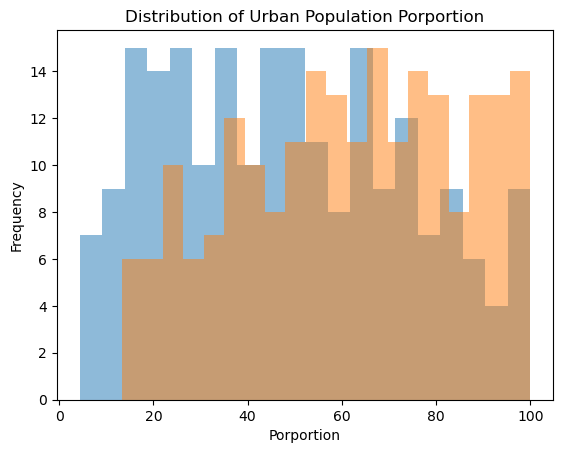

In [53]:
# Write your own code here

data_frame = pd.read_csv("data/wdi_urban.csv")
unique_values = data_frame["year"].unique() 
fig, graph = plt.subplots()

for year in unique_values:
    data = data_frame[data_frame["year"] == year]["prop_urbanpopulation"]
    graph.hist(data, bins = 20, alpha = 0.5, label = str(year))
graph.set_xlabel("Porportion")
graph.set_ylabel("Frequency")
graph.set_title("Distribution of Urban Population Porportion")
